In [10]:
import numpy as np
import pandas as pd
import os
import h5py
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# To get the images and labels from file
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# To convert the labels to categorical 10 classes
cat_labels = utils.to_categorical(labels, 10)

# To convert to desirable type
#labels = labels.astype(np.float32)
images = images.astype(np.uint8)

In [3]:
labels

array([0., 0., 0., ..., 9., 9., 9.], dtype=float32)

In [4]:
images

array([[[[ 68,  19,  23],
         [ 58,  17,  33],
         [ 40,  16,  40],
         ...,
         [ 51,  46,  43],
         [ 40,  41,  33],
         [ 28,  38,  30]],

        [[ 61,  40,  37],
         [ 52,  43,  44],
         [ 29,  39,  41],
         ...,
         [ 28,  30,  42],
         [ 28,  32,  35],
         [ 33,  40,  33]],

        [[ 30,  31,  25],
         [ 24,  41,  33],
         [ 15,  45,  33],
         ...,
         [ 21,  35,  48],
         [ 25,  35,  45],
         [ 37,  41,  40]],

        ...,

        [[ 28,  32,  35],
         [ 27,  31,  32],
         [ 42,  44,  43],
         ...,
         [ 20,  37,  27],
         [ 19,  40,  21],
         [ 27,  50,  24]],

        [[ 22,  36,  37],
         [ 19,  29,  30],
         [ 33,  37,  38],
         ...,
         [ 17,  35,  35],
         [ 17,  35,  21],
         [ 26,  45,  17]],

        [[ 18,  39,  40],
         [ 14,  28,  29],
         [ 24,  30,  30],
         ...,
         [ 20,  35,  56],
        

In [7]:
label_names = ['Disturbed', 'Merging', 'Round Smooth', 'In-between Round Smooth', 'Cigar Shaped Smooth', 'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on without Bulge', 'Edge-on with Bulge']

In [8]:
class_dict = {num:gal_type for num,gal_type in zip(range(10), label_names)}
class_dict

{0: 'Disturbed',
 1: 'Merging',
 2: 'Round Smooth',
 3: 'In-between Round Smooth',
 4: 'Cigar Shaped Smooth',
 5: 'Barred Spiral',
 6: 'Unbarred Tight Spiral',
 7: 'Unbarred Loose Spiral',
 8: 'Edge-on without Bulge',
 9: 'Edge-on with Bulge'}

In [5]:
num_plots = 10

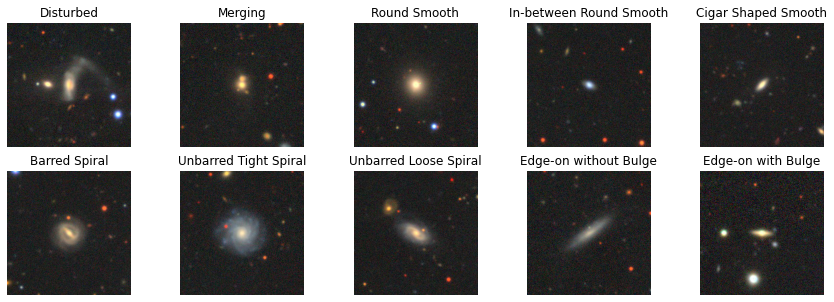

In [9]:
fig, axs = plt.subplots(2,5, figsize=(15,5), sharex=True, sharey=True)

for idx, plot in enumerate(axs.flatten()):
    class_idx = np.argwhere(labels==idx)[0][0]
    plot.imshow(images[class_idx])
    plot.set_title(class_dict[labels[class_idx]])
    plot.axis('off')

#plt.savefig('galaxy-classification/imgs/class_examples.png')

In [13]:
labs, counts = np.unique(labels, return_counts=True)

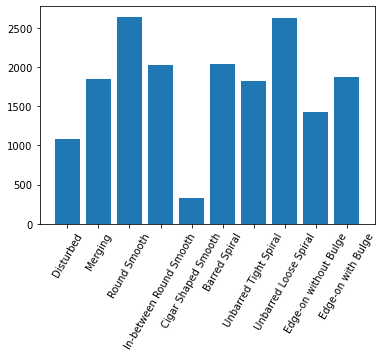

In [23]:
fig, ax = plt.subplots()
ax.bar(labs, counts, tick_label = label_names)
ax.set_xticklabels(label_names, rotation=60);

In [53]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, cat_labels, test_size=0.1, stratify=labels)
#X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels)

In [45]:
print(y_train.shape, y_test.shape)

(15962,) (1774,)


In [46]:
def count_class(y, ax, xtick_labels = label_names):
    labels, count = np.unique(y, return_counts = True)
    ax.bar(labels, count, tick_label = xtick_labels)
    ax.set_xticklabels(xtick_labels, rotation=60);

Text(0.5, 1.0, 'Test Set')

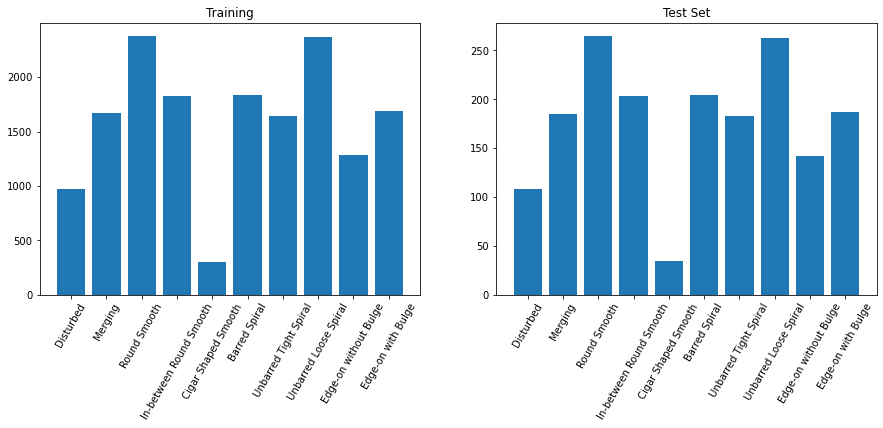

In [52]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for ax,y in zip(axs.flatten(),[y_train, y_test]):
    count_class(y, ax)
axs[0].set_title('Training')
axs[1].set_title('Test Set')

## Convolutional Neural Network